In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# LSTM model
class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_Model, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: (seq_len, batch_size, input_size)
        h0 = torch.zeros(1, x.size(1), self.hidden_size).to(x.device)  # Initial hidden state
        c0 = torch.zeros(1, x.size(1), self.hidden_size).to(x.device)  # Initial cell state

        # LSTM forward pass
        out, _ = self.lstm(x, (h0, c0))
        out = self.linear(out[-1])  # We only care about the last time step

        return out

In [5]:
# Generate data for addition problem (pairs of numbers)
def generate_addition_data(seq_length, num_samples):
    X = []
    Y = []
    for _ in range(num_samples):
        x1 = np.random.randint(0, 100)
        x2 = np.random.randint(0, 100)
        seq = np.array([[x1], [x2]])  # Shape (2, 1) for each pair
        sum_seq = x1 + x2  # Target output: the sum
        X.append(seq)
        Y.append(sum_seq)
    return np.array(X), np.array(Y)

In [7]:
# Hyperparameters
input_size = 1  # Single number at each timestep
hidden_size = 64
output_size = 1  # Output will be a single number (sum)
seq_length = 2  # Each pair of numbers is given as a sequence of length 2
num_samples = 1000
learning_rate = 0.001
epochs = 5000

In [9]:
# Generate data
X, Y = generate_addition_data(seq_length, num_samples)

In [11]:
# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32).view(-1, 1)  # Flatten to (num_samples, 1)

# Create the LSTM model, loss function and optimizer
model = LSTM_Model(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training Loop
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_tensor.permute(1, 0, 2))  # Change shape to (seq_len, batch_size, input_size)
    loss = criterion(outputs, Y_tensor)
    losses.append(loss.item())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')


Epoch 0/5000, Loss: 11261.5048828125
Epoch 100/5000, Loss: 9834.345703125
Epoch 200/5000, Loss: 8193.271484375
Epoch 300/5000, Loss: 7130.59716796875
Epoch 400/5000, Loss: 6267.8564453125
Epoch 500/5000, Loss: 5532.2890625
Epoch 600/5000, Loss: 4899.1103515625
Epoch 700/5000, Loss: 4352.63720703125
Epoch 800/5000, Loss: 3869.3759765625
Epoch 900/5000, Loss: 3388.52783203125
Epoch 1000/5000, Loss: 2991.72412109375
Epoch 1100/5000, Loss: 2645.373291015625
Epoch 1200/5000, Loss: 2341.40087890625
Epoch 1300/5000, Loss: 2061.984375
Epoch 1400/5000, Loss: 1827.6915283203125
Epoch 1500/5000, Loss: 1621.8917236328125
Epoch 1600/5000, Loss: 1441.0621337890625
Epoch 1700/5000, Loss: 1282.185302734375
Epoch 1800/5000, Loss: 1142.42822265625
Epoch 1900/5000, Loss: 1019.2874145507812
Epoch 2000/5000, Loss: 910.7904052734375
Epoch 2100/5000, Loss: 815.2149047851562
Epoch 2200/5000, Loss: 730.8031005859375
Epoch 2300/5000, Loss: 656.0521850585938
Epoch 2400/5000, Loss: 589.7027587890625
Epoch 2500/50

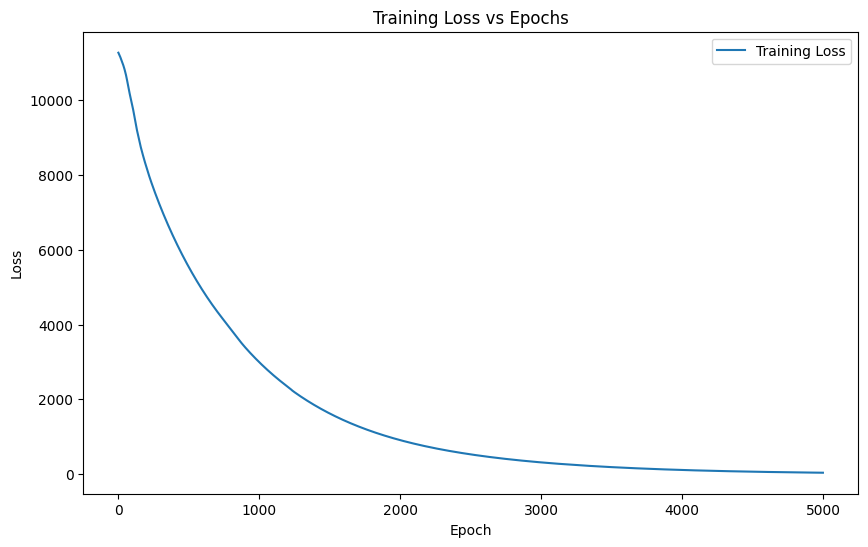

In [12]:
# Plotting loss over time
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

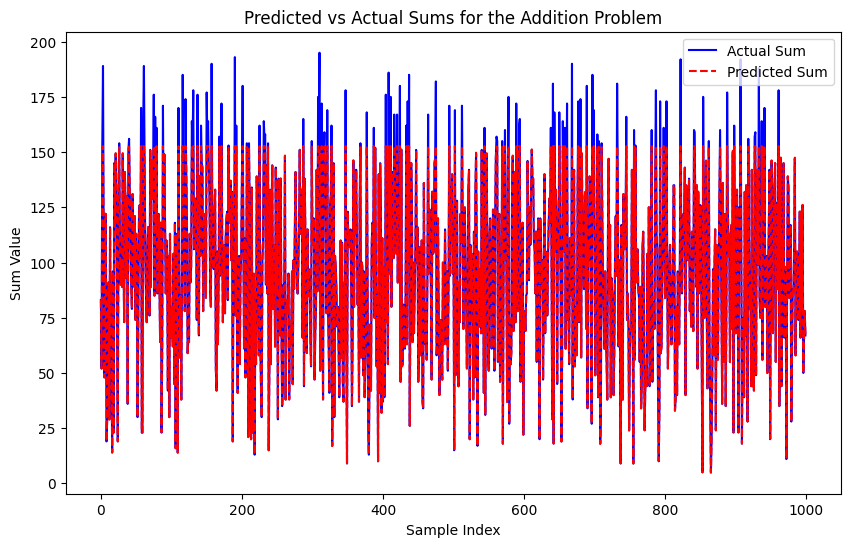

In [13]:
# Visualizing predictions vs actuals
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    predicted = model(X_tensor.permute(1, 0, 2))

# Plot predictions vs actual sums
plt.figure(figsize=(10, 6))
plt.plot(Y_tensor.numpy(), label='Actual Sum', color='blue')
plt.plot(predicted.numpy(), label='Predicted Sum', color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Sum Value')
plt.title('Predicted vs Actual Sums for the Addition Problem')
plt.legend()
plt.show()
